<a href="https://colab.research.google.com/github/JacekPardyak/resume/blob/master/man/figures/colab/resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [29]:
# install texlive with xetex engine
system('sudo apt-get update -y > /dev/null 2>&1', intern = TRUE)
system('sudo apt-get install -y texlive-xetex > /dev/null 2>&1', intern = TRUE)
# you add support for your language
system('sudo apt-get install -y texlive-lang-polish', intern = TRUE)
system('sudo apt-get install -y texlive-lang-cyrillic', intern = TRUE)

character(0)

character(0)

[1] "Reading package lists..."                                            
[2] "Building dependency tree..."                                         
[3] "Reading state information..."                                        
[4] "texlive-lang-polish is already the newest version (2021.20220204-1)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded."

[1] "Reading package lists..."                                              
[2] "Building dependency tree..."                                           
[3] "Reading state information..."                                          
[4] "texlive-lang-cyrillic is already the newest version (2021.20220204-1)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded."

In [30]:
devtools::install_github("jacekpardyak/resume")
library(magrittr)
writeLinesTidy = function(text, con){writeLines(text, con ); return(con)}

Skipping install of 'resume' from a github remote, the SHA1 (92d71bba) has not changed since last install.
  Use `force = TRUE` to force installation



In [31]:
# simple test if everything  works
'---
title: My Document
output: pdf_document
params:
  year: 2018
  region: Europe
  printcode: TRUE
  data: file.csv
---' %>% writeLinesTidy("MyDocument.Rmd") %>%
  rmarkdown::render(params = list(
  year = 2017,
  region = "Asia",
  printcode = FALSE,
  data = "file2.csv"
))



processing file: MyDocument.Rmd



1/1


output file: MyDocument.knit.md




/usr/bin/pandoc +RTS -K512m -RTS MyDocument.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output MyDocument.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --highlight-style tango --pdf-engine pdflatex --variable graphics --variable 'geometry:margin=1in' 



Output created: MyDocument.pdf



# Check available `resume` templates

In [32]:
rmarkdown::available_templates(package = "resume", full_path = FALSE)

[1] "cover_letter"     "curriculum_vitae" "motivatiebrief"   "resume"

# Render Cover Letter

In [33]:
# default document with font changed to default Ubuntu font
path = "Untitled"
if (file.exists(path)) {unlink(path, recursive = TRUE)}
rmarkdown::draft(paste0(path, ".Rmd"), template="cover_letter", package="resume", create_dir = TRUE, edit = FALSE)
# get name of font and use it to update the template
# system('fc-list', intern = TRUE)
paste0(path, "/", path, ".Rmd") %>% readLines() %>%
  gsub("Times New Roman", "Liberation Serif",. ) %>%
  writeLinesTidy(paste0(path, "/", path, ".Rmd")) %>%
  rmarkdown::render()



processing file: Untitled.Rmd



1/1


output file: Untitled.knit.md




/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/cover_letter/resources/template.tex --highlight-style tango --pdf-engine xelatex 



Output created: Untitled.pdf



In [34]:
# modify YAML as you wish and render it
'---
applicant:
    name: Томас із Вікіпедії
    address:
      - line: вул. Гродзька 31
      - line: 31-234 Краків
      - line: Польща

employer:
    name: Компанія «Ян Ковальський і син»
    address:
      - line: вул. Межигірська, 63
      - line: Київ
      - line: Україна

opening: >
  Пані та панове,

header: >
  Я редактор Вікіпедії, безкоштовної та вільної енциклопедії. Мета нашого проекту – зібрати всі знання, розвинути та поширити їх безкоштовно на благо людства. Водночас ми дуже поважаємо авторські права, і саме з цього приводу я до вас звертаюся.

body: >
  На вашому сайті є чудові фотографії центру Торуня. Ми будемо дуже вдячні, якщо ви надасте нам дозвіл використовувати їх у Вікіпедії (включаючи статті про Торунь), якщо ви володієте авторським правом на це. Оскільки ми надаємо великого значення авторському праву, ми не будемо публікувати ці матеріали без прямої згоди автора.

tail: >
  Дуже дякую за ваш час,

closing: >
  З повагою,

output:
  resume::cover_letter:
    latex_engine: xelatex
    keep_tex: true
  language: ukrainian
  font_size: 11pt
  paper_size: a4paper
  font: Liberation Serif
---
' %>% writeLinesTidy(paste0(path, "/", path, ".Rmd")) %>%
  rmarkdown::render()



processing file: Untitled.Rmd



1/1


output file: Untitled.knit.md




/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/cover_letter/resources/template.tex --highlight-style tango --pdf-engine xelatex 



Output created: Untitled.pdf



In [35]:
# install Inkscape - optional step to convert pdf to png so that can be shown in Jupyter
system('sudo add-apt-repository -y universe > /dev/null 2>&1', intern = TRUE)
system('sudo add-apt-repository -y ppa:inkscape.dev/stable > /dev/null 2>&1', intern = TRUE)
system('sudo apt-get -y update > /dev/null 2>&1', intern = TRUE)
system('sudo apt install -y inkscape', intern = TRUE)
system('inkscape --version', intern = TRUE)

character(0)

character(0)

character(0)

[1] "Reading package lists..."                                                             
[2] "Building dependency tree..."                                                          
[3] "Reading state information..."                                                         
[4] "inkscape is already the newest version (1:1.3+202307231459+0e150ed6c4~ubuntu22.04.1)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded."

[1] "Inkscape 1.3 (1:1.3+202307231459+0e150ed6c4)"

character(0)

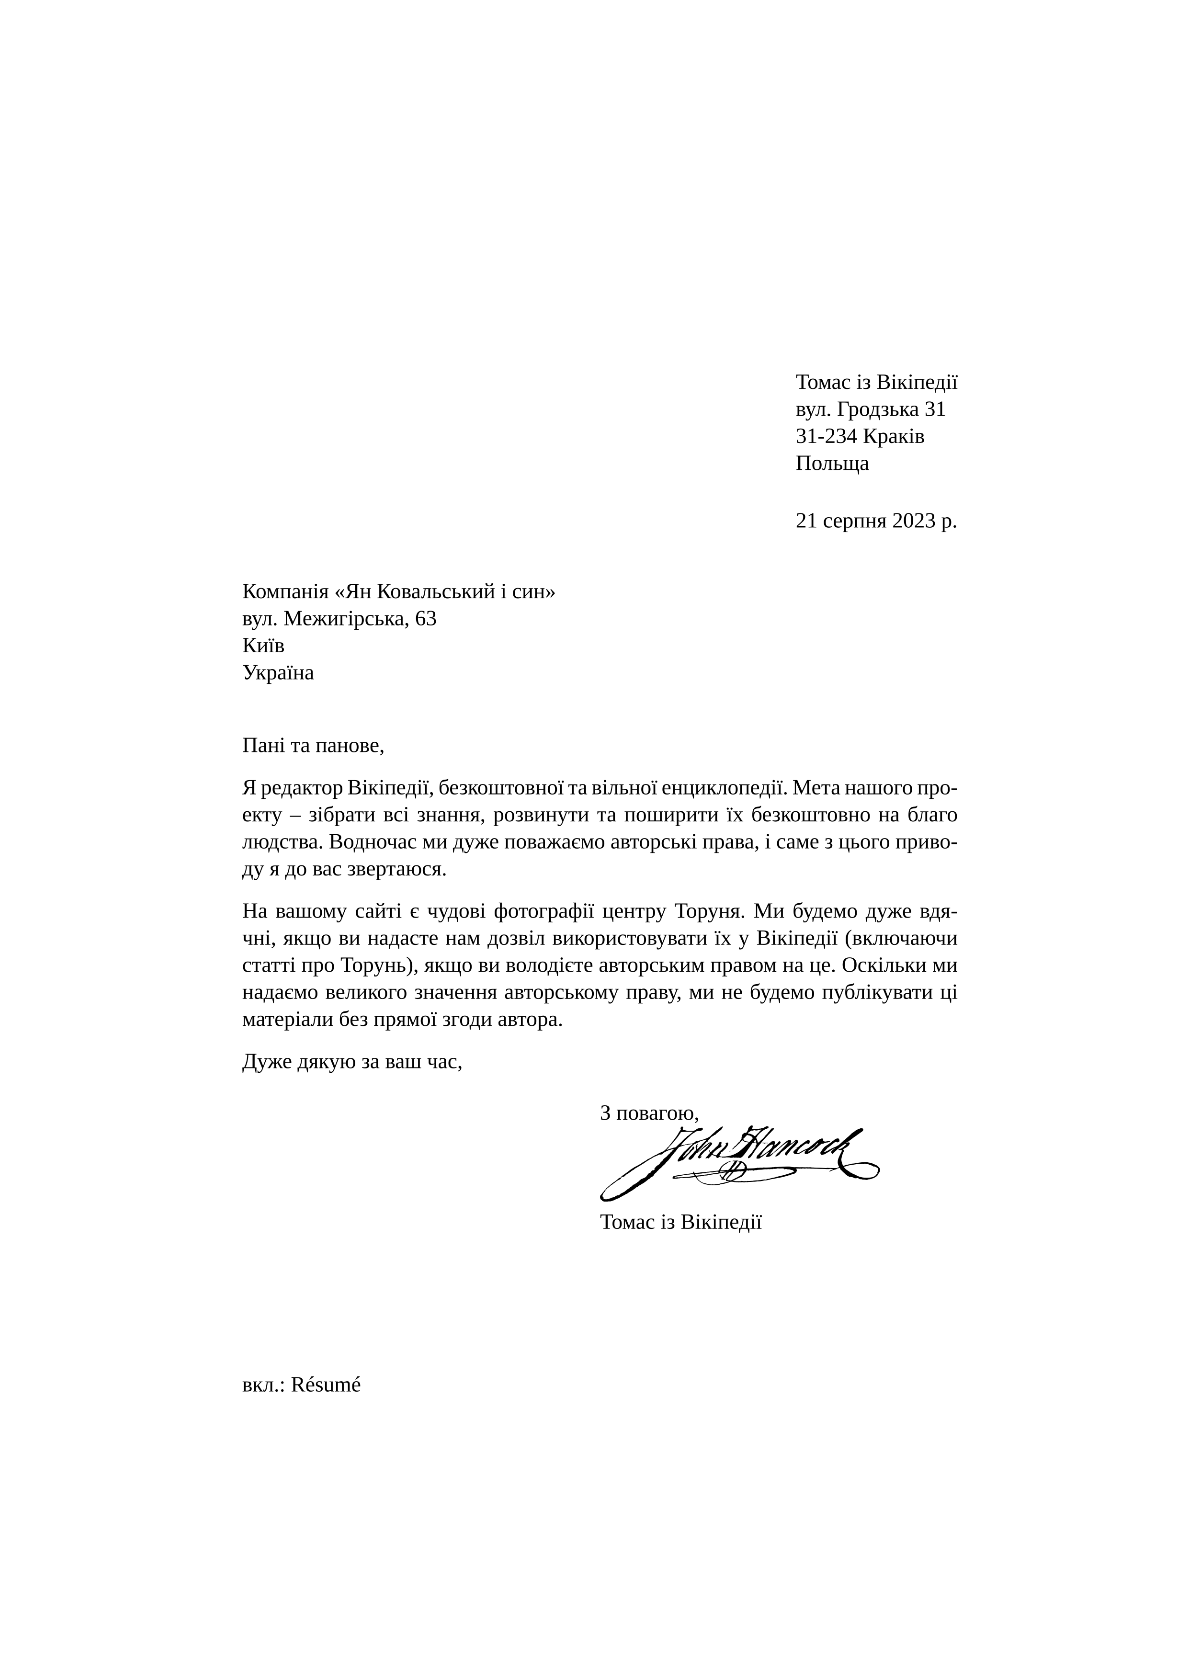

In [36]:
# # plot your cover letter
if(! require('png')) install.packages('png')
options(repr.plot.width = 10, repr.plot.height = 14)
library(png)
library(grid)
library(ggplot2)
system('inkscape --export-background-opacity=0 --export-dpi=300 --export-type=png /content/Untitled/Untitled.pdf > /dev/null 2>&1', intern = TRUE)
img = '/content/Untitled/Untitled.pdf.png' %>%  readPNG() %>% rasterGrob(interpolate = TRUE)
ggplot() +
  theme_void() +
  annotation_custom(img, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf)

# Render Résumé

In [37]:
path = "Untitled"
if (file.exists(path)) {unlink(path, recursive = TRUE)}
rmarkdown::draft(paste0(path, ".Rmd"), template="resume", package="resume", create_dir = TRUE, edit = FALSE)
paste0(path, "/", path, ".Rmd") %>% readLines() %>%
  gsub("Arial", "Liberation Serif",. ) %>%
  writeLinesTidy(paste0(path, "/", path, ".Rmd")) %>%
  rmarkdown::render()



processing file: Untitled.Rmd



1/1


output file: Untitled.knit.md




/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/resume/resources/template.tex --highlight-style tango --pdf-engine xelatex 



Output created: Untitled.pdf



In [38]:
'---
contact:
    name: Audra Hammond
    degree:
    street: Tampa
    city: Florida
    telephone: 555-813-4458
    email: audra.hammond@email.com

summary: >
  Sales manager with five years of experience eager to use relationship management, organizational and research skills to optimize sales strategies.

education:
  - school: University of Eastern Shore
    title: Bachelor of Arts in sales
    year: 2003
  - school: Seinäjoki College, Finland
    title: Graduate
    year: 1998
experience:
  - employer: Industry Plus Magazine
    city: Tampa, Florida
    position: Sales Manager
    period: February 2022–Current
    duties:
    - duty: Assist sales team to achieve profit goals, averaging $200,000 in annual client revenue
    - duty: Oversee development of a 15-member sales team by promoting results-driven strategies
    - duty: Develop client acquisition and lead generation strategies by conducting market research
    - duty: Project expected sales volume for existing accounts to properly allocate budget
    - duty: Analyze budget to reduce expenditure and optimize profits
  - employer: Monkey Foot Publishing
    city: Tampa, Florida
    position: Assistant Relationship
    period: July 2018–February 2022
    duties:
    - duty: Developed a territory plan and make adjustments based on analysis of competitor behavior
    - duty: Educated clients on new products and services to optimize upselling tactics
    - duty: Maintained record of customer comments, complaints and inquiries

skills:
  - skill: Relationship management
  - skill: Time management
  - skill: Consultative sales
  - skill: Communication

output:
  resume::resume:
    latex_engine: xelatex
    keep_tex: true
  font_size: 11pt
  paper_size: letterpaper
  font: Liberation Serif
---
' %>% writeLinesTidy(paste0(path, "/", path, ".Rmd")) %>%
  rmarkdown::render()



processing file: Untitled.Rmd



1/1


output file: Untitled.knit.md




/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/resume/resources/template.tex --highlight-style tango --pdf-engine xelatex 



Output created: Untitled.pdf



character(0)

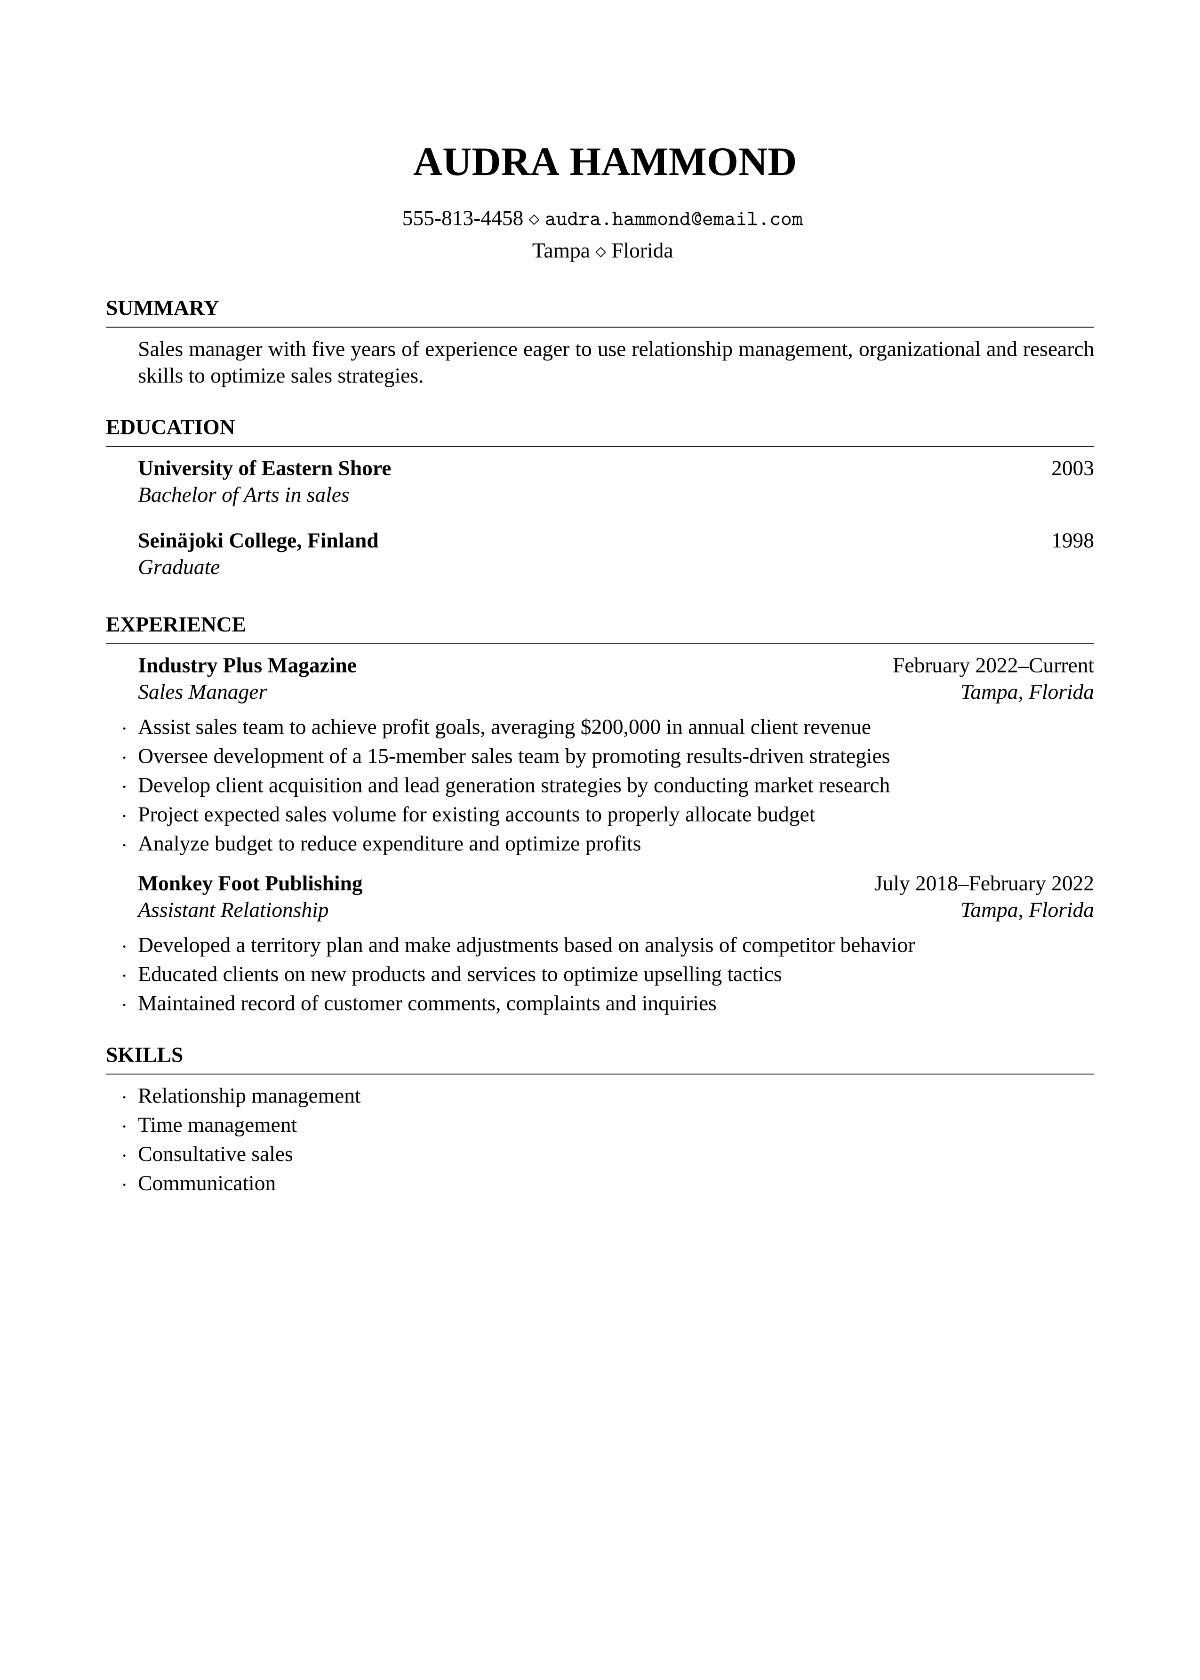

In [39]:
# plot your résumé
system('inkscape --export-background-opacity=0 --export-dpi=300 --export-type=png /content/Untitled/Untitled.pdf > /dev/null 2>&1', intern = TRUE)
img = '/content/Untitled/Untitled.pdf.png' %>%  readPNG() %>% rasterGrob(interpolate = TRUE)
ggplot() +
  theme_void() +
  annotation_custom(img, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf)